In [1]:
# import Library yang dibutuhkan
import pandas as pd                   #dataframe manipulation
import numpy as np                    #scientific camputing
import seaborn as sns                 #visualization
import matplotlib.pyplot as plt       #visualization
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [37]:
# import csv
cd = pd.read_csv("C:/Users/HP/Desktop/Data Amazon/amz_ca.csv") 

In [11]:
# Hapus kolom yang tidak digunakan
cd = cd.drop(['imgUrl', 'productURL'], axis=1) 

cd.head()

,asin,title,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,0.00,Industrial Scientific,False,100


In [17]:
# Rename kolom
cd = cd.rename(columns = {"asin" : "ID", 
                          "title" : "name",
                         "stars" : "rating",
                         "reviews" : "reviewCount",
                          "price" : "discountedPrice",
                          "listPrice" : "normalPrice",
                         "boughtInLastMonth" : "quantity"})

cd.head()

,ID,name,rating,reviewCount,discountedPrice,normalPrice,categoryName,isBestSeller,quantity
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,0.00,Industrial Scientific,False,100


In [19]:
# Hapus baris di mana kolom 'price' atau 'quantity' mengandung 0
cd = cd[(cd['discountedPrice'] != 0) & (cd['quantity'] != 0) & (cd['normalPrice'] != 0)].dropna()

cd['quantity'].value_counts()

quantity
50       9869
100      6072
200      2423
300      1244
400       778
1000      724
500       516
600       378
700       273
800       236
2000      203
900       168
3000       96
4000       43
5000       23
6000       15
8000       11
7000        9
10000       8
9000        3
20000       1
Name: count, dtype: int64

In [21]:
cd.count()

ID                 23093
name               23093
rating             23093
reviewCount        23093
discountedPrice    23093
normalPrice        23093
categoryName       23093
isBestSeller       23093
quantity           23093
dtype: int64

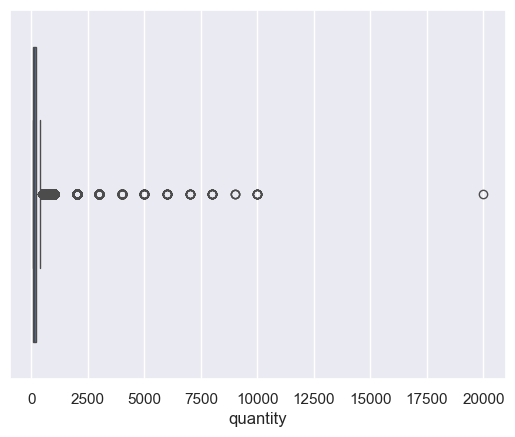

In [23]:
# Cek outlier
sns.boxplot(x=cd['quantity'])
plt.show()

In [25]:
'''range quantity dibatasi 400'''
cd = cd[cd['quantity'] <= 400]
cd.shape

(20386, 9)

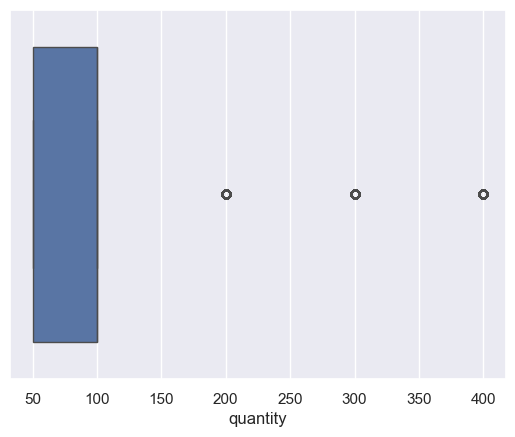

In [27]:
# Setelah outlier quantity dibuang
sns.boxplot(x=cd['quantity'])
plt.show()

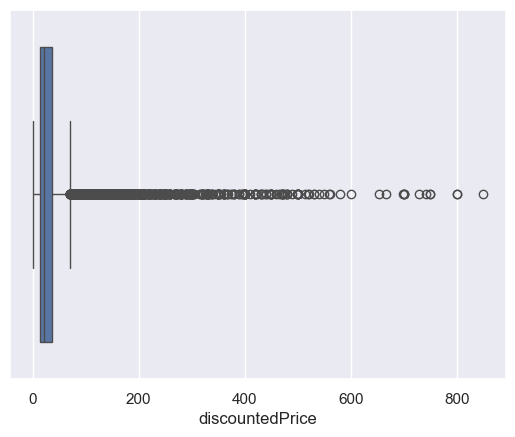

In [31]:
# Cek outlier price
sns.boxplot(x=cd['discountedPrice'])
plt.show()

In [33]:
''' Kolom City diambil dari tabel Ca  '''
ca = pd.read_csv("C:/Users/HP/Desktop/Data Amazon/AmazonCa.csv") 

# Merge kolom city
cd = pd.merge(cd, ca[['ID', 'city']], on='ID', how='left')


cd.head()

,ID,name,rating,reviewCount,discountedPrice,normalPrice,categoryName,isBestSeller,quantity,city
0,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,27.99,Industrial Scientific,False,50,Toronto
1,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,30.99,Industrial Scientific,False,100,Montreal
2,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",4.4,366,29.99,35.99,Industrial Scientific,False,50,Montreal
3,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,4.7,142,21.99,25.99,Industrial Scientific,False,50,Toronto
4,B000LQEV9Y,"Sunex 2300, 1/2"" Drive, Universal Impact Joint...",4.7,1828,24.00,26.71,Industrial Scientific,False,50,Edmonton


In [35]:
# Export into CSV
cd.to_csv("C:/Users/HP/Desktop/Data Amazon/AmazonCa_discounted.csv", index=False)